![Königsweg Logo](../img/koenigsweg_150.png)

<span style="font-size: small;float: right;">&copy; 2015-2020 Alexander C.S. Hendorf, <a href="http://koenigsweg.com">Königsweg GmbH</a>, Mannheim </span>

---

# Analytics with  Pandas and Jupyterlab

---

# Data Aggregation with Pandas

---

In [1]:
import numpy as np
import pandas as pd
import random
from IPython.core.display import Image, display

### Aggregation

Pandas logic was inspired by SQL.

In [2]:
sales_data = pd.read_excel('../data/blooth_sales_data_clean.xlsx')
sales_data['turnover'] = sales_data['units'] * sales_data['unitprice']
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [3]:
sales_data.groupby('customer').count()[:5]

,name,birthday,orderdate,product,units,unitprice,turnover
customer,,,,,,,
Advanced Incorporated,5,5,5,5,5,5,5
Advanced Limited,3,3,3,3,3,3,3
Advanced People Telecom Incorporated,3,3,3,3,3,3,3
Advanced Resource LLC,1,1,1,1,1,1,1
Alpha Industries,4,4,4,4,4,4,4


In [4]:
sales_data.groupby('customer').count().sort_values('units', ascending=False)[:5]

,name,birthday,orderdate,product,units,unitprice,turnover
customer,,,,,,,
Design Agency,14,14,14,14,14,14,14
Technology Limited,10,10,10,10,10,10,10
Signal Industries,10,10,10,10,10,10,10
People Galaxy Incorporated,9,9,9,9,9,9,9
Source Industries Alpha Co,9,9,9,9,9,9,9


In [5]:
sales_data.groupby(['customer', 'product']).sum().sort_values('turnover', ascending=False)[:5]

,,units,unitprice,turnover
customer,product,,,
Electronics Resource Group,Corolla,73,48397.05,1761028.86
Interactive International,Corolla,74,44386.43,1657451.10
General Contract Corporation,Corolla,73,42970.93,1570308.92
Data Building Corporation,Corolla,61,43250.93,1326018.58
Max Technology Incorporated,Corolla,52,45123.84,1208129.52


In [6]:
sales_data.groupby(['customer', 'product']).sum().index

MultiIndex(levels=[['Advanced Incorporated', 'Advanced Limited', 'Advanced People Telecom Incorporated', 'Advanced Resource LLC', 'Alpha Industries', 'Alpha Software Pacific Organization', 'Analysis Graphics Provider Incorporated', 'Analysis Graphics Telecom Agency', 'Analysis Limited', 'Analysis Solutions Limited', 'Analysis Technology LLC', 'Analysis West Limited', 'Application Industries', 'Application Systems Group', 'Architecture Galaxy Building Industries', 'Architecture Incorporated', 'Architecture Organization', 'Architecture Technology Solutions Corporation', 'Atlantic Corporation', 'Atlantic Frontier Studio Industries', 'Atlantic Incorporated', 'Atlantic Network Galaxy Agency', 'Bell Inc', 'Bell Star Corporation', 'Building Construction Group', 'Building Future Provider Inc', 'Building Power Advanced Incorporated', 'Building Research Frontier LLC', 'Building Research Venture Organization', 'Building Resource Star Co', 'Construction Adventure Innovation Limited', 'Construction

See more on Multi-Indexes below

---

#### Execise

Find the product with the lowest turnover of all.

In [ ]:
# Your code here


In [ ]:
# %load ../solutions/501.py

Indentify the best sold product per customer with the lowest turnover.

In [ ]:
# Your code here


In [ ]:
# %load ../solutions/502.py


---

**`.agg()`** aka. **`.aggreagte()`**

In [7]:
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [8]:
sales_data['turnover'].agg([sum, min, max])

sum    57794302.12
min          10.00
max     1206764.65
Name: turnover, dtype: float64

In [11]:
sales_data[['turnover', 'units']].agg({'turnover': min, 'units': max})

turnover    10.0
units       50.0
dtype: float64

In [12]:
def myfunc(series):
    return series.sum()/series.count()

sales_data[['turnover', 'units']].agg(myfunc)

turnover    57794.30212
units          25.84200
dtype: float64

---

#### Excercise

Calculate the median of *turnover* using agg

\begin{equation*} \tilde{x} = \begin{cases} x_{\frac{n+1}{2}} & \text{for } n \text{ odd}\\ \frac{1}{2}\left(x_{\frac{n}{2}} + x_{\frac{n}{2}+1}\right) & \text{for } n \text{ even} \end{cases} \end{equation*}

In [ ]:
# Your code here


In [ ]:
# %load ../solutions/503.py

Calculate the median birthday using agg.<br>
Hint: you can add datetime.timedelta(days=n) to datetime.datetime()

In [ ]:
# Your code here


In [ ]:
# %load ../solutions/504.py

---

### Pivoting

Another possibiliy to aggreagate data, you might know the pivoting from Excel  

In [13]:
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [14]:
pvt = pd.pivot_table(sales_data,
               values='turnover',
               index=['customer', 'product'],
               aggfunc=np.sum,
                      )

In [16]:
pvt

turnover
customer                                product                     
Advanced Incorporated                   Harry Potter book     115.14
                                        Lipitor               448.40
                                        Rubik’s Cube          174.68
                                        Thriller record       154.08
                                        iPad                 2029.89
Advanced Limited                        Corolla            797401.44
                                        Star Wars             330.33
                                        banana                 90.00
Advanced People Telecom Incorporated    iPad                64713.74
Advanced Resource LLC                   Harry Potter book     870.48
Alpha Industries                        Harry Potter book      82.67
                                        PlayStation          3843.00
                                        Thriller record       650.94
                                        banana                150.00
Alpha Software Pacific Organization     Rubik’s Cube          709.41
Analysis Graphics Provider Incorporated Harry Potter book     113.76
                                        PlayStation          2276.46
                                        Rubik’s Cube          692.12
                                        banana                190.00
Analysis Graphics Telecom Agency        Rubik’s Cube          187.32
                                        iPad                22745.20
Analysis Limited                        PlayStation         12208.40
                                        Star Wars              33.64
                                        iPad                47260.07
Analysis Solutions Limited              Lipitor               536.00
                                        Rubik’s Cube           15.48
Analysis Technology LLC                 Lipitor               410.40
                                        PlayStation          6841.90
                                        Star Wars             328.68
                                        banana                460.00
...                                                              ...
Vision Co                               PlayStation         14939.89
Vision Direct Electronics Group         Harry Potter book     429.80
                                        Star Wars              42.16
Vision Hill Resource Corporation        Star Wars              44.40
Vision Inc                              Lipitor               192.06
                                        PlayStation          2682.16
                                        banana                280.00
                                        iPad                23261.03
Vision Limited                          Corolla            564702.04
                                        Rubik’s Cube          774.18
                                        Star Wars             166.60
                                        banana                140.00
Vision Speed International              Rubik’s Cube         1177.56
                                        Star Wars              90.63
                                        iPad                  957.64
                                        iPhone              22036.52
Vision Telecom Adventure Limited        Corolla            109269.60
                                        Star Wars             175.98
West Building Digital Limited           Corolla            736522.92
                                        Harry Potter book     829.91
                                        PlayStation          7623.99
                                        Star Wars              21.26
                                        Thriller record       407.34
West Net Adventure Incorporated         Corolla            512311.81
                                        Harry Potter book     958.88
West Solutions Limited                  Lipitor           

---

### Reshaping with **`.melt()`**

In [17]:
data = pd.DataFrame({
    'first': ['John', 'Mary'],
    'last': ['Wayne', 'Martin'],
    'latin': [5.5, 6.0],
    'greek': [130, 150],
    'math': [130, 150],
})
data

,first,last,latin,greek,math
0,John,Wayne,5.5,130,130
1,Mary,Martin,6.0,150,150


In [18]:
data.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Wayne,latin,5.5
1,Mary,Martin,latin,6.0
2,John,Wayne,greek,130.0
3,Mary,Martin,greek,150.0
4,John,Wayne,math,130.0
5,Mary,Martin,math,150.0


---

**`.stack() / .unstack()`**

In [19]:
sales_data.stack()

0    name                              Pasquale
     birthday               1967-09-02 00:00:00
     customer                   Electronics Inc
     orderdate       2016-07-17 13:48:03.157000
     product                    Thriller record
     units                                    2
     unitprice                            13.27
     turnover                             26.54
1    name                                 India
     birthday               1968-12-13 00:00:00
     customer        Electronics Resource Group
     orderdate       2016-07-06 13:48:03.157000
     product                            Corolla
     units                                   26
     unitprice                          24458.7
     turnover                            635926
2    name                                 Wayne
     birthday               1992-09-10 00:00:00
     customer     East Application Contract Inc
     orderdate       2016-07-22 13:48:03.157000
     product                       Rubik

In [20]:
sales_data.stack().unstack()

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02 00:00:00,Electronics Inc,2016-07-17 13:48:03.157000,Thriller record,2,13.27,26.54
1,India,1968-12-13 00:00:00,Electronics Resource Group,2016-07-06 13:48:03.157000,Corolla,26,24458.7,635926
2,Wayne,1992-09-10 00:00:00,East Application Contract Inc,2016-07-22 13:48:03.157000,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05 00:00:00,Signal Industries,2016-07-23 13:48:03.157000,iPhone,16,584.01,9344.16
4,Chang,1972-04-23 00:00:00,Star Alpha Industries,2016-07-16 13:48:03.157000,Harry Potter book,4,25.69,102.76
5,Weldon,1953-03-17 00:00:00,Network Application Co,2016-07-22 13:48:03.157000,Lipitor,1,11.22,11.22
6,Sung,1977-10-23 00:00:00,Omega Pacific Future Incorporated,2016-07-09 13:48:03.157000,PlayStation,25,294.9,7372.5
7,Emily,1982-07-02 00:00:00,Medicine Incorporated,2016-07-16 13:48:03.157000,Thriller record,5,18.27,91.35
8,Cornell,1963-07-02 00:00:00,Technology Direct Star Limited,2016-07-08 13:48:03.157000,Rubik’s Cube,35,15.98,559.3
9,Ervin,1977-10-14 00:00:00,Provider Agency,2016-07-19 13:48:03.157000,Star Wars,24,11.5,276


---

## Merging

In [21]:
df = pd.read_json('../data/sampledf.json')
df.index = ["R{:02d}".format(i) for i in range(len(df))]
df.columns = ["C{:02d}".format(i) for i in range(len(df.columns))]
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,79,19,21,99,35,59,44,25,75,58
R01,25,39,89,66,9,41,6,69,63,3
R02,37,64,31,69,61,97,5,11,76,57
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12
R06,12,29,18,98,62,68,92,29,74,96
R07,36,32,22,4,66,25,63,51,59,14
R08,55,53,89,13,84,87,74,3,2,64
R09,46,74,36,54,21,12,68,33,80,25


In [22]:
add_df = pd.Series([random.randint(0, 100) for x in range(10)], 
                    index=["R{:02d}".format(i) for i in range(3, len(df)+3)])
add_df.name = 'C10'
add_df

R03    84
R04    12
R05    97
R06    24
R07    44
R08    82
R09    54
R10    50
R11    20
R12    41
Name: C10, dtype: int64

In [23]:
df['C10'] = add_df
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,NaN
R01,25,39,89,66,9,41,6,69,63,3,NaN
R02,37,64,31,69,61,97,5,11,76,57,NaN
R03,74,61,100,6,58,80,95,50,15,51,84.0
R04,79,60,83,85,16,5,16,69,5,20,12.0
R05,45,26,73,73,100,60,21,19,95,12,97.0
R06,12,29,18,98,62,68,92,29,74,96,24.0
R07,36,32,22,4,66,25,63,51,59,14,44.0
R08,55,53,89,13,84,87,74,3,2,64,82.0
R09,46,74,36,54,21,12,68,33,80,25,54.0


In [24]:
df.drop('C10', errors='ignore')

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,NaN
R01,25,39,89,66,9,41,6,69,63,3,NaN
R02,37,64,31,69,61,97,5,11,76,57,NaN
R03,74,61,100,6,58,80,95,50,15,51,84.0
R04,79,60,83,85,16,5,16,69,5,20,12.0
R05,45,26,73,73,100,60,21,19,95,12,97.0
R06,12,29,18,98,62,68,92,29,74,96,24.0
R07,36,32,22,4,66,25,63,51,59,14,44.0
R08,55,53,89,13,84,87,74,3,2,64,82.0
R09,46,74,36,54,21,12,68,33,80,25,54.0


In [25]:
df.drop('C10', errors='ignore', axis=1, inplace=True)
df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,79,19,21,99,35,59,44,25,75,58
R01,25,39,89,66,9,41,6,69,63,3
R02,37,64,31,69,61,97,5,11,76,57
R03,74,61,100,6,58,80,95,50,15,51
R04,79,60,83,85,16,5,16,69,5,20
R05,45,26,73,73,100,60,21,19,95,12
R06,12,29,18,98,62,68,92,29,74,96
R07,36,32,22,4,66,25,63,51,59,14
R08,55,53,89,13,84,87,74,3,2,64
R09,46,74,36,54,21,12,68,33,80,25


In [26]:
pd.DataFrame(add_df)

,C10
R03,84
R04,12
R05,97
R06,24
R07,44
R08,82
R09,54
R10,50
R11,20
R12,41


#### Inner Joins

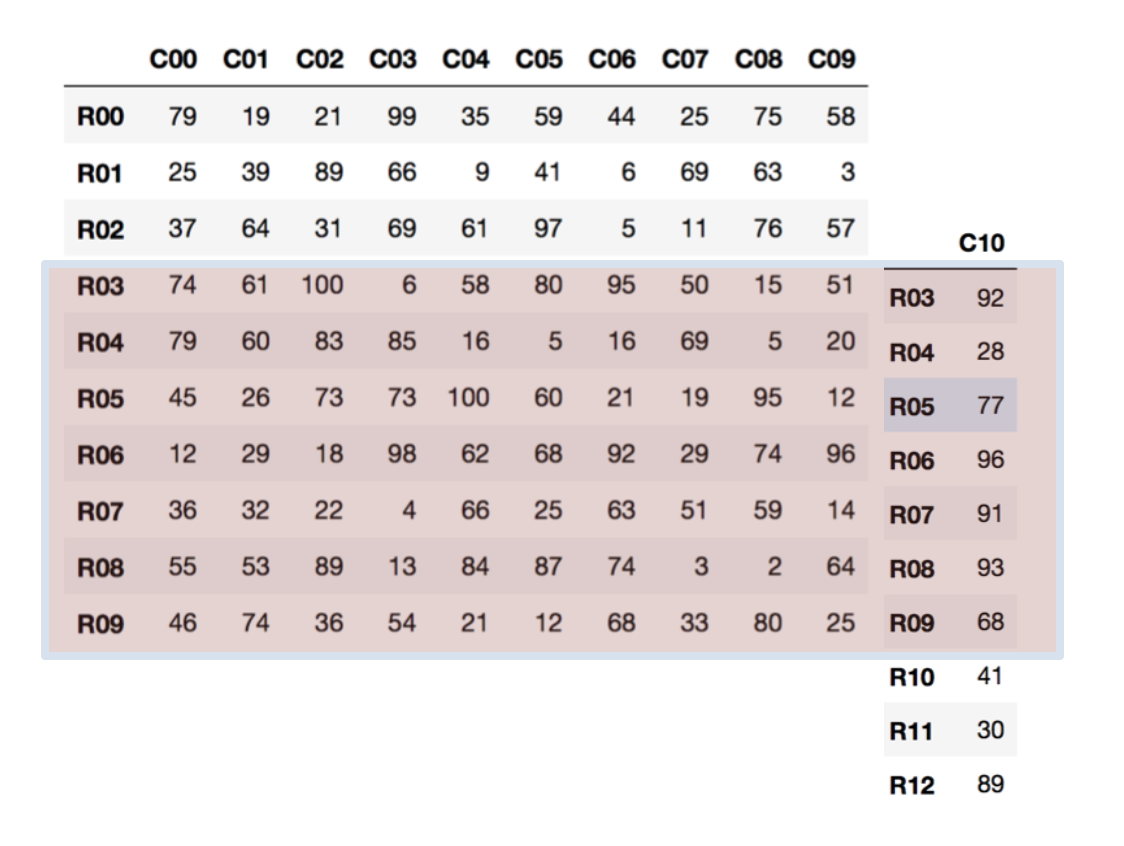

In [27]:
display(Image("../img/join-inner.png", width=450, unconfined=True))
#<img src="../img/join-inner.png" alt="Drawing" style="float: left; width: 450px ;"/>

In [28]:
df.join(pd.DataFrame(add_df), how='inner')
# inner: both indexes match

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R03,74,61,100,6,58,80,95,50,15,51,84
R04,79,60,83,85,16,5,16,69,5,20,12
R05,45,26,73,73,100,60,21,19,95,12,97
R06,12,29,18,98,62,68,92,29,74,96,24
R07,36,32,22,4,66,25,63,51,59,14,44
R08,55,53,89,13,84,87,74,3,2,64,82
R09,46,74,36,54,21,12,68,33,80,25,54


In [29]:
df.drop('C10', errors='ignore', axis=1, inplace=True)  # cleanup

#### Outer Joins

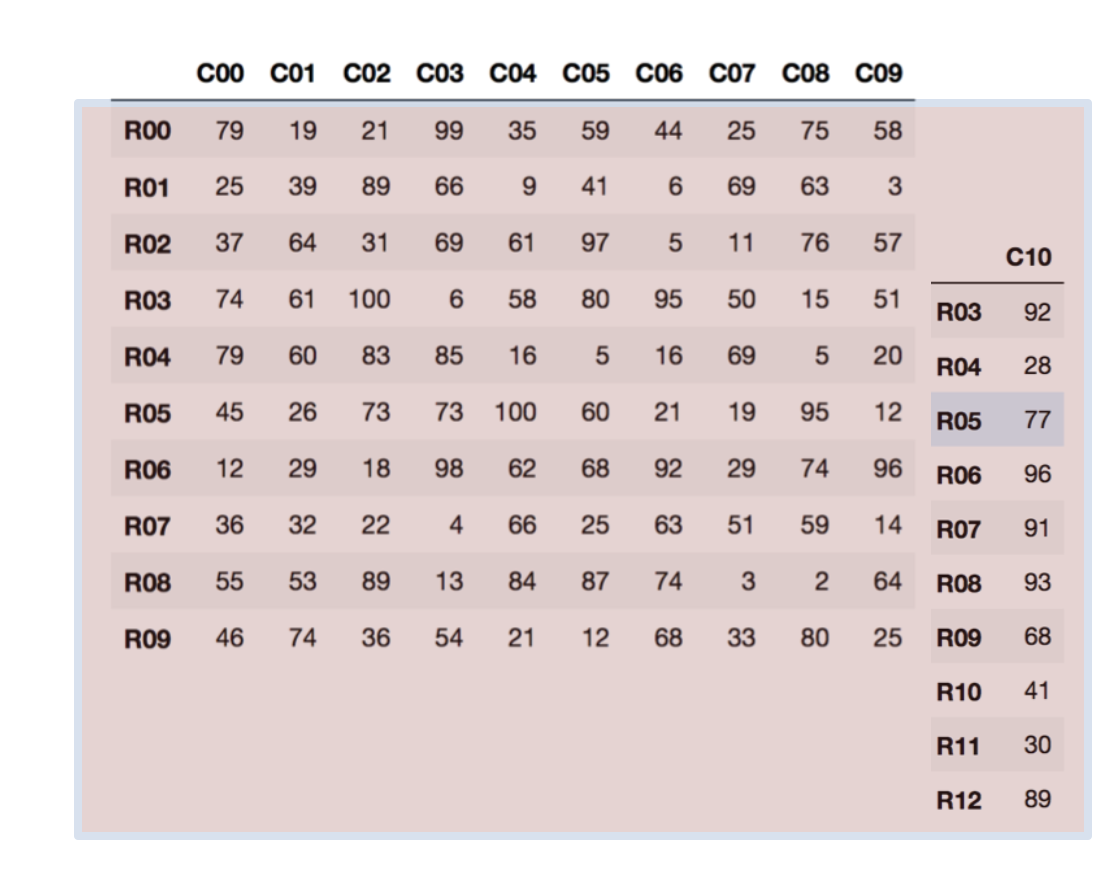

In [30]:
display(Image("../img/join-outer.png", width=450, unconfined=True))

In [31]:
df.join(pd.DataFrame(add_df), how='outer')
# outer: combines everything - puts NaN if no match on either side

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79.0,19.0,21.0,99.0,35.0,59.0,44.0,25.0,75.0,58.0,NaN
R01,25.0,39.0,89.0,66.0,9.0,41.0,6.0,69.0,63.0,3.0,NaN
R02,37.0,64.0,31.0,69.0,61.0,97.0,5.0,11.0,76.0,57.0,NaN
R03,74.0,61.0,100.0,6.0,58.0,80.0,95.0,50.0,15.0,51.0,84.0
R04,79.0,60.0,83.0,85.0,16.0,5.0,16.0,69.0,5.0,20.0,12.0
R05,45.0,26.0,73.0,73.0,100.0,60.0,21.0,19.0,95.0,12.0,97.0
R06,12.0,29.0,18.0,98.0,62.0,68.0,92.0,29.0,74.0,96.0,24.0
R07,36.0,32.0,22.0,4.0,66.0,25.0,63.0,51.0,59.0,14.0,44.0
R08,55.0,53.0,89.0,13.0,84.0,87.0,74.0,3.0,2.0,64.0,82.0
R09,46.0,74.0,36.0,54.0,21.0,12.0,68.0,33.0,80.0,25.0,54.0


In [32]:
df.drop('C10', errors='ignore', axis=1, inplace=True)  # cleanup

#### Left-Outer Joins

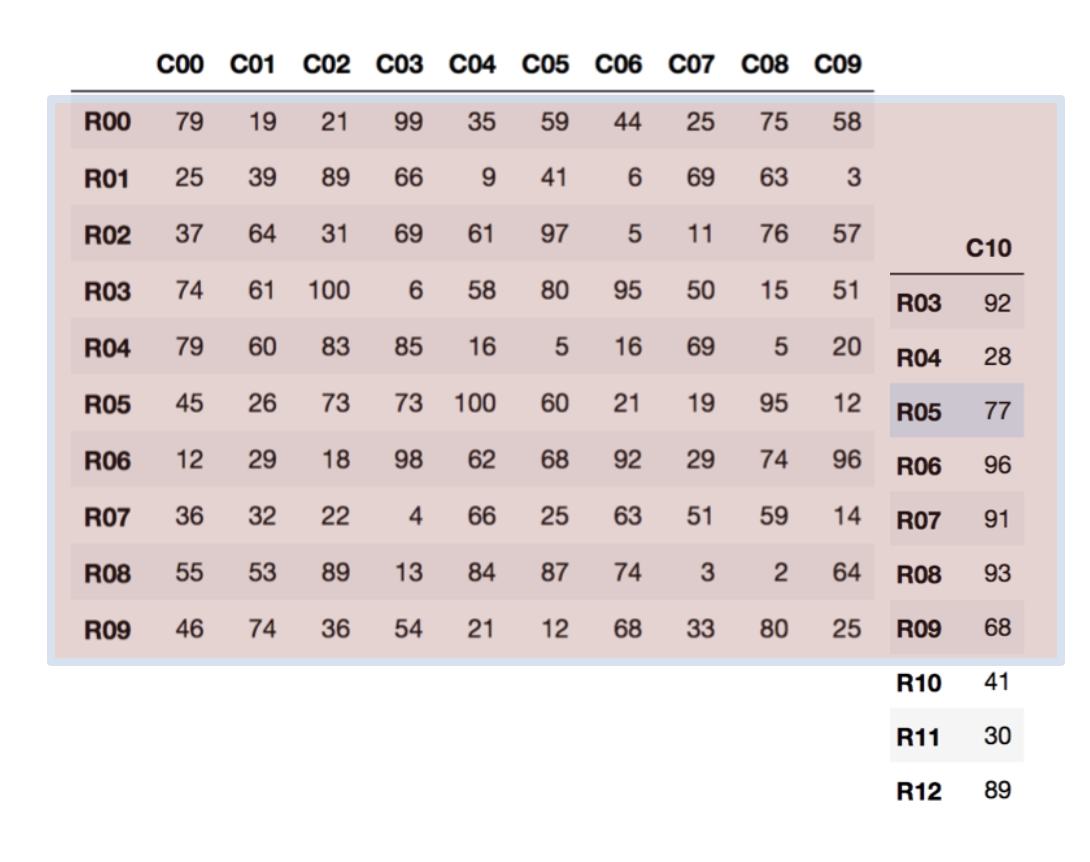

In [33]:
display(Image("../img/join-left.png", width=450, unconfined=True))

In [34]:
df.join(pd.DataFrame(add_df), how='left')
# left: match all that occur in left = df joined upon

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R00,79,19,21,99,35,59,44,25,75,58,NaN
R01,25,39,89,66,9,41,6,69,63,3,NaN
R02,37,64,31,69,61,97,5,11,76,57,NaN
R03,74,61,100,6,58,80,95,50,15,51,84.0
R04,79,60,83,85,16,5,16,69,5,20,12.0
R05,45,26,73,73,100,60,21,19,95,12,97.0
R06,12,29,18,98,62,68,92,29,74,96,24.0
R07,36,32,22,4,66,25,63,51,59,14,44.0
R08,55,53,89,13,84,87,74,3,2,64,82.0
R09,46,74,36,54,21,12,68,33,80,25,54.0


In [35]:
df.drop('C10', errors='ignore', axis=1, inplace=True)  # cleanup

#### Right-Outer Joins

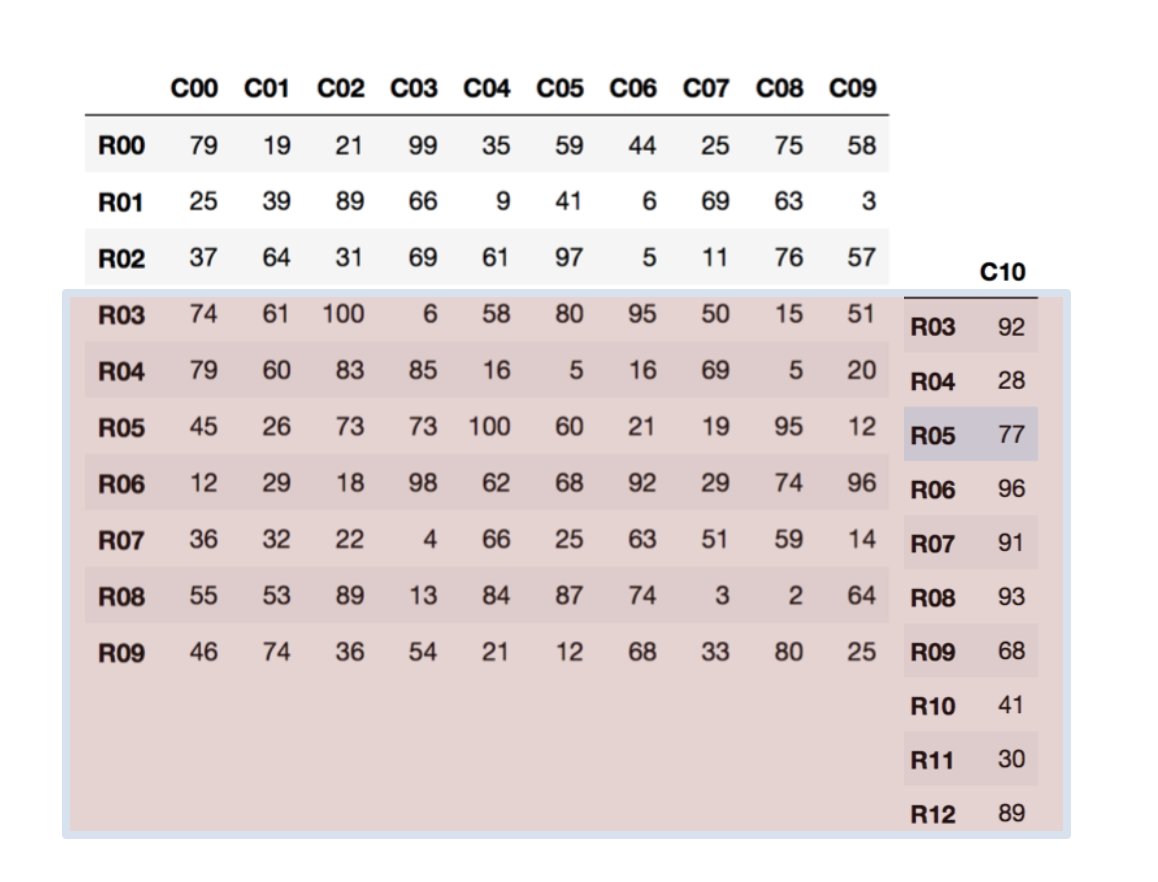

In [36]:
display(Image("../img/join-right.png", width=450, unconfined=True))

In [37]:
df.join(pd.DataFrame(add_df), how='right')
# right: mtach all that occur in right=joined df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10
R03,74.0,61.0,100.0,6.0,58.0,80.0,95.0,50.0,15.0,51.0,84
R04,79.0,60.0,83.0,85.0,16.0,5.0,16.0,69.0,5.0,20.0,12
R05,45.0,26.0,73.0,73.0,100.0,60.0,21.0,19.0,95.0,12.0,97
R06,12.0,29.0,18.0,98.0,62.0,68.0,92.0,29.0,74.0,96.0,24
R07,36.0,32.0,22.0,4.0,66.0,25.0,63.0,51.0,59.0,14.0,44
R08,55.0,53.0,89.0,13.0,84.0,87.0,74.0,3.0,2.0,64.0,82
R09,46.0,74.0,36.0,54.0,21.0,12.0,68.0,33.0,80.0,25.0,54
R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
R11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
R12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41


---

### Multi-Index

In [38]:
# Create some demo data
somany = 20
dfm = pd.DataFrame({'city':[x for x in 
                            ['Paris', 'London', 'Berlin', 'New York', 'Mannheim']*10][:20],
      'category': [random.randint(1, 3) for x in range(somany)],
      'price': [random.randint(150, 300) for x in range(somany)],
      'rating': [random.randint(0, 10) for x in range(somany)]})
dfm['country'] = dfm['city'].map(
    {'Paris': 'FR', 'London': 'GB', 'Berlin': 'DE', 'New York': 'US', 'Mannheim': 'DE'})

In [39]:
dfm

,city,category,price,rating,country
0,Paris,1,293,10,FR
1,London,3,272,7,GB
2,Berlin,3,266,9,DE
3,New York,1,204,4,US
4,Mannheim,3,281,8,DE
5,Paris,3,158,8,FR
6,London,1,286,0,GB
7,Berlin,1,278,3,DE
8,New York,2,239,0,US
9,Mannheim,2,300,2,DE


In [40]:
dfg = dfm.groupby(['country', 'city', 'category']).mean()

In [44]:
dfg

price    rating
country city     category                      
DE      Berlin   1         265.000000  4.333333
                 3         266.000000  9.000000
        Mannheim 1         205.000000  6.000000
                 2         300.000000  2.000000
                 3         275.000000  8.500000
FR      Paris    1         238.333333  7.000000
                 3         158.000000  8.000000
GB      London   1         286.000000  0.000000
                 3         262.000000  4.000000
US      New York 1         233.000000  5.000000
                 2         239.000000  0.000000
                 3         188.000000  0.000000

In [45]:
dfg.index

MultiIndex(levels=[['DE', 'FR', 'GB', 'US'], ['Berlin', 'London', 'Mannheim', 'New York', 'Paris'], [1, 2, 3]],
           codes=[[0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3], [0, 0, 2, 2, 2, 4, 4, 1, 1, 3, 3, 3], [0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2]],
           names=['country', 'city', 'category'])

In [43]:
dfg.index.levels

FrozenList([['DE', 'FR', 'GB', 'US'], ['Berlin', 'London', 'Mannheim', 'New York', 'Paris'], [1, 2, 3]])

In [46]:
dfg.index.names

FrozenList(['country', 'city', 'category'])

In [47]:
dfg.index.values

array([('DE', 'Berlin', 1), ('DE', 'Berlin', 3), ('DE', 'Mannheim', 1),
       ('DE', 'Mannheim', 2), ('DE', 'Mannheim', 3), ('FR', 'Paris', 1),
       ('FR', 'Paris', 3), ('GB', 'London', 1), ('GB', 'London', 3),
       ('US', 'New York', 1), ('US', 'New York', 2),
       ('US', 'New York', 3)], dtype=object)

In [ ]:
dfg.stack()

In [ ]:
pd.set_option('display.multi_sparse', False)
dfg

In [ ]:
pd.set_option('display.multi_sparse', True)

In [48]:
dfg.index.get_level_values(2)

Int64Index([1, 3, 1, 2, 3, 1, 3, 1, 3, 1, 2, 3], dtype='int64', name='category')

In [49]:
dfg.index.get_level_values(1)

Index(['Berlin', 'Berlin', 'Mannheim', 'Mannheim', 'Mannheim', 'Paris',
       'Paris', 'London', 'London', 'New York', 'New York', 'New York'],
      dtype='object', name='city')

In [50]:
dfg.loc['DE']

price    rating
city     category                 
Berlin   1         265.0  4.333333
         3         266.0  9.000000
Mannheim 1         205.0  6.000000
         2         300.0  2.000000
         3         275.0  8.500000

In [51]:
dfg.loc[('FR', 'Paris')]

,price,rating
category,,
1,238.333333,7.0
3,158.000000,8.0


In [52]:
dfg.loc[('FR', 'Paris')].max()

price     238.333333
rating      8.000000
dtype: float64

In [53]:
dfg.loc[('DE', 'Mannheim', 1)]

price     205.0
rating      6.0
Name: (DE, Mannheim, 1), dtype: float64